In [177]:
import pandas as pd

In [178]:
# Import data

driver_df = pd.read_csv("data/drivers.csv")
constructors_df = pd.read_csv("data/constructors.csv")

lap_times_df = pd.read_csv("data/lap_times.csv")
qualifying_df = pd.read_csv("data/qualifying.csv")

races_df = pd.read_csv("data/races.csv")
results_df = pd.read_csv("data/results.csv")
status_df = pd.read_csv("data/status.csv")
standings_df = pd.read_csv("data/driver_standings.csv")

In [179]:
# Change the races_df to have a datetime index
races_df["date"] = pd.to_datetime(races_df["date"])
races_df = races_df.set_index("date")

In [181]:
# Create a dataframe with race ID and date. And a function to add the date as the index of other dataframes
id_date = pd.DataFrame()
id_date["raceId"] = races_df["raceId"]
id_date = id_date.reset_index()

def raceId_to_date(df):
    df = df.merge(id_date,how="left", on="raceId").set_index("date").sort_index()
    return df

<Axes: xlabel='date'>

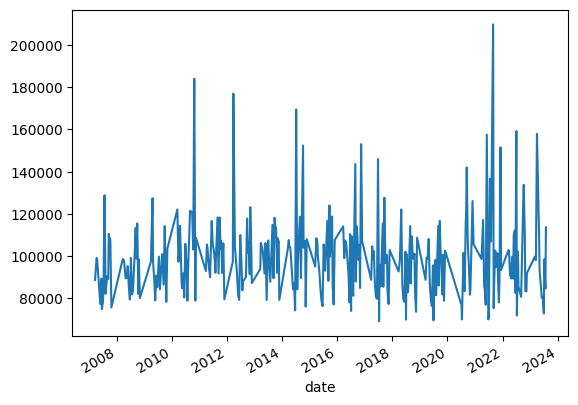

In [192]:
lap_times_df = raceId_to_date(lap_times_df)
lap_times_df[lap_times_df["driverId"] == 1].groupby("date")["milliseconds"].mean().plot()

In [184]:
results_df = raceId_to_date(results_df)

<Axes: xlabel='date'>

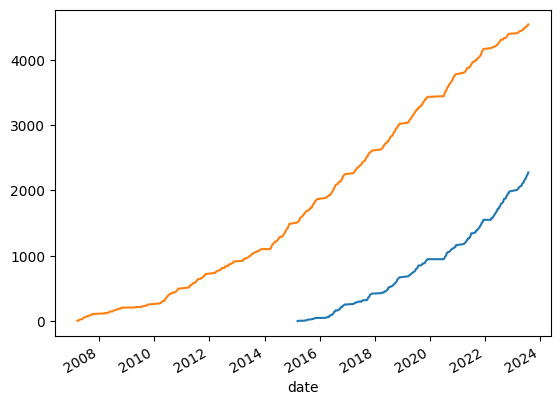

In [191]:
results_df[results_df["driverId"] == 830]["points"].cumsum().plot()
results_df[results_df["driverId"] == 1]["points"].cumsum().plot()

In [ ]:
test["time"] = pd.to_datetime(test["time"], format="%M:%S.%f")